<a href="https://colab.research.google.com/github/Yash-slr/IHUB_LAB_and_PROJECTS/blob/main/AIML_Module_3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization

---

## Binary Classification Task: Diabetes Dataset

We’ll be using ML techniques learnt uptil now to predict whether a Pima Indian Woman has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.



# Introduction

Scientists carried out a study to investigate the significance of health-related predictors of diabetes in **Pima Indian Women**. The study population was females (21 years and above) of Pima Indian heritage.

The purpose of the study was to find out the factors that are associated with the presence of diabetes in Pima Indians.

To find out the reason behind this, we have to first analyze the relationship between different features, such as the number of times a woman was pregnant, their BMI, prevalence of diabetes, etc.

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [101]:
# Upload the preprocessed diabetes data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [102]:
diabetes_data = pd.read_csv('diabetes.csv')

In [103]:
# View top 10 rows of the Diabetes dataset
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Identification of variables and data types

In [104]:
diabetes_data.shape

(768, 9)

Dataset comprises of 768 observations and 9 fields.

The following features have been provided to help us predict whether a person is diabetic or not:

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test. Less than 140 mg/dL is considered normal level of glucose.
* **BloodPressure:** Diastolic blood pressure (mm Hg). 120/80 is normal BP level for females above 18 years old.
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml). 16-166 mIU/L is considered the normal level of insulin.
* **BMI:** Body mass index (weight in kg/((height in m$)^2$))
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (in years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


In [105]:
# Get the details of each column
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Let us see distribution and also boxplot for outliers of feature "Pregnancies".

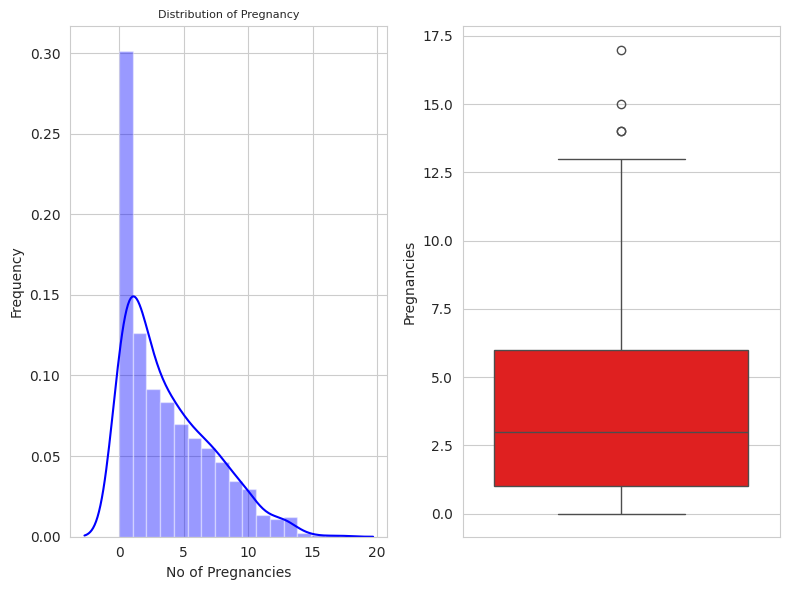

In [106]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot(data=diabetes_data['Pregnancies'], ax=axes[1],orient = 'v', color='r')
plt.tight_layout()

In [107]:
## TASK-1 :
## Find out the "Correlation" between the different attributes present in the data.
## Also plot a heatmap (refer Seaborn documentation) for the correlation values obtained.

Correlation Matrix:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


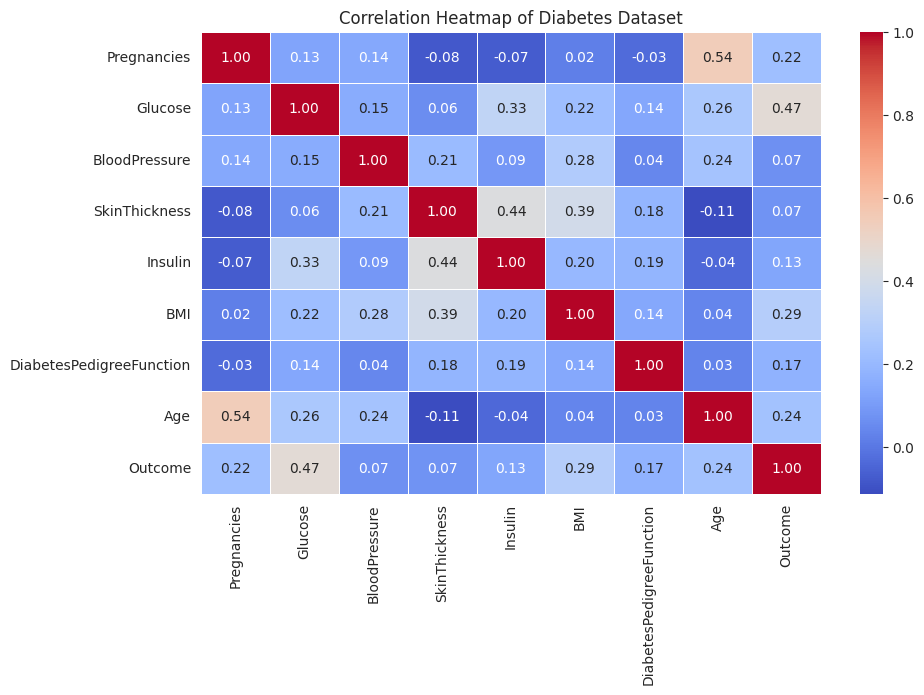

In [108]:
# Task-1: Correlation analysis
correlation_matrix = diabetes_data.corr()

# Display correlation values
print("Correlation Matrix:")
display(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Diabetes Dataset", fontsize=12)
plt.show()


In [109]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

* From the correlation map you just obtained above, it seems that Insulin is highly correlated with Glucose, BMI and Age. It means that as the values of glucose, BMI and Age increase, the insulin is also increasing. It seems logical also that overweight and elderly people might have a higher level of insulin in their bodies.  

* In the same way SkinThickness is highly correlated with BMI.

## Checking  if the data is balanced or imbalanced

We can produce a seaborn count plot to check if the output is dominated by one of the classes or not.

Outcome
0    500
1    268
Name: count, dtype: int64


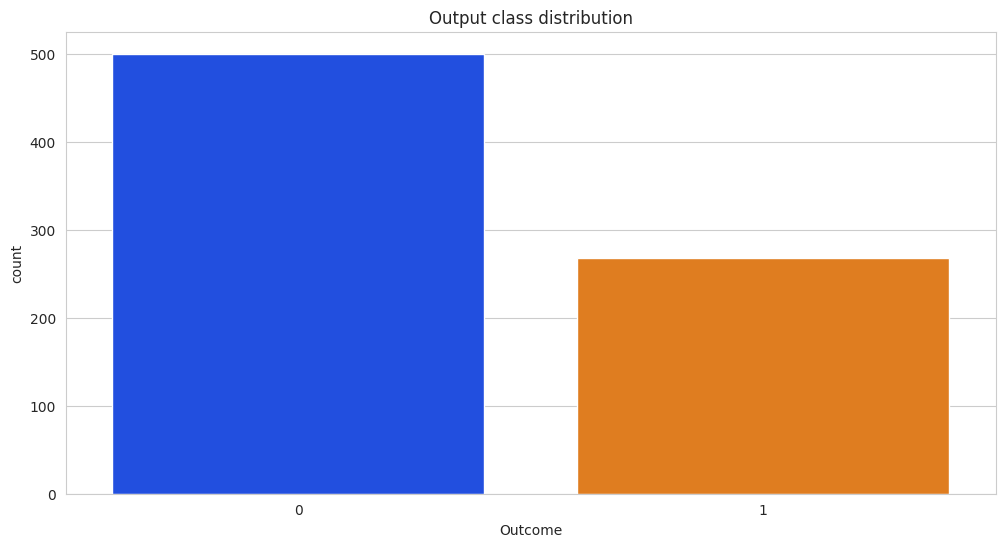

In [110]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A total of 768 women were registered in the database. 268 women had diabetes, while 500 women did not have diabetes.

The above graph shows that the dataset is biased towards non-diabetic people. The number of non-diabetic people is almost twice the number of diabetic patients.

## Scatter matrix of data

A pair-plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [111]:
## TASK-2: Display a pairplot using Seaborn for the diabetes dataset, with the 'outcome' as the hue.

<Figure size 1200x1000 with 0 Axes>

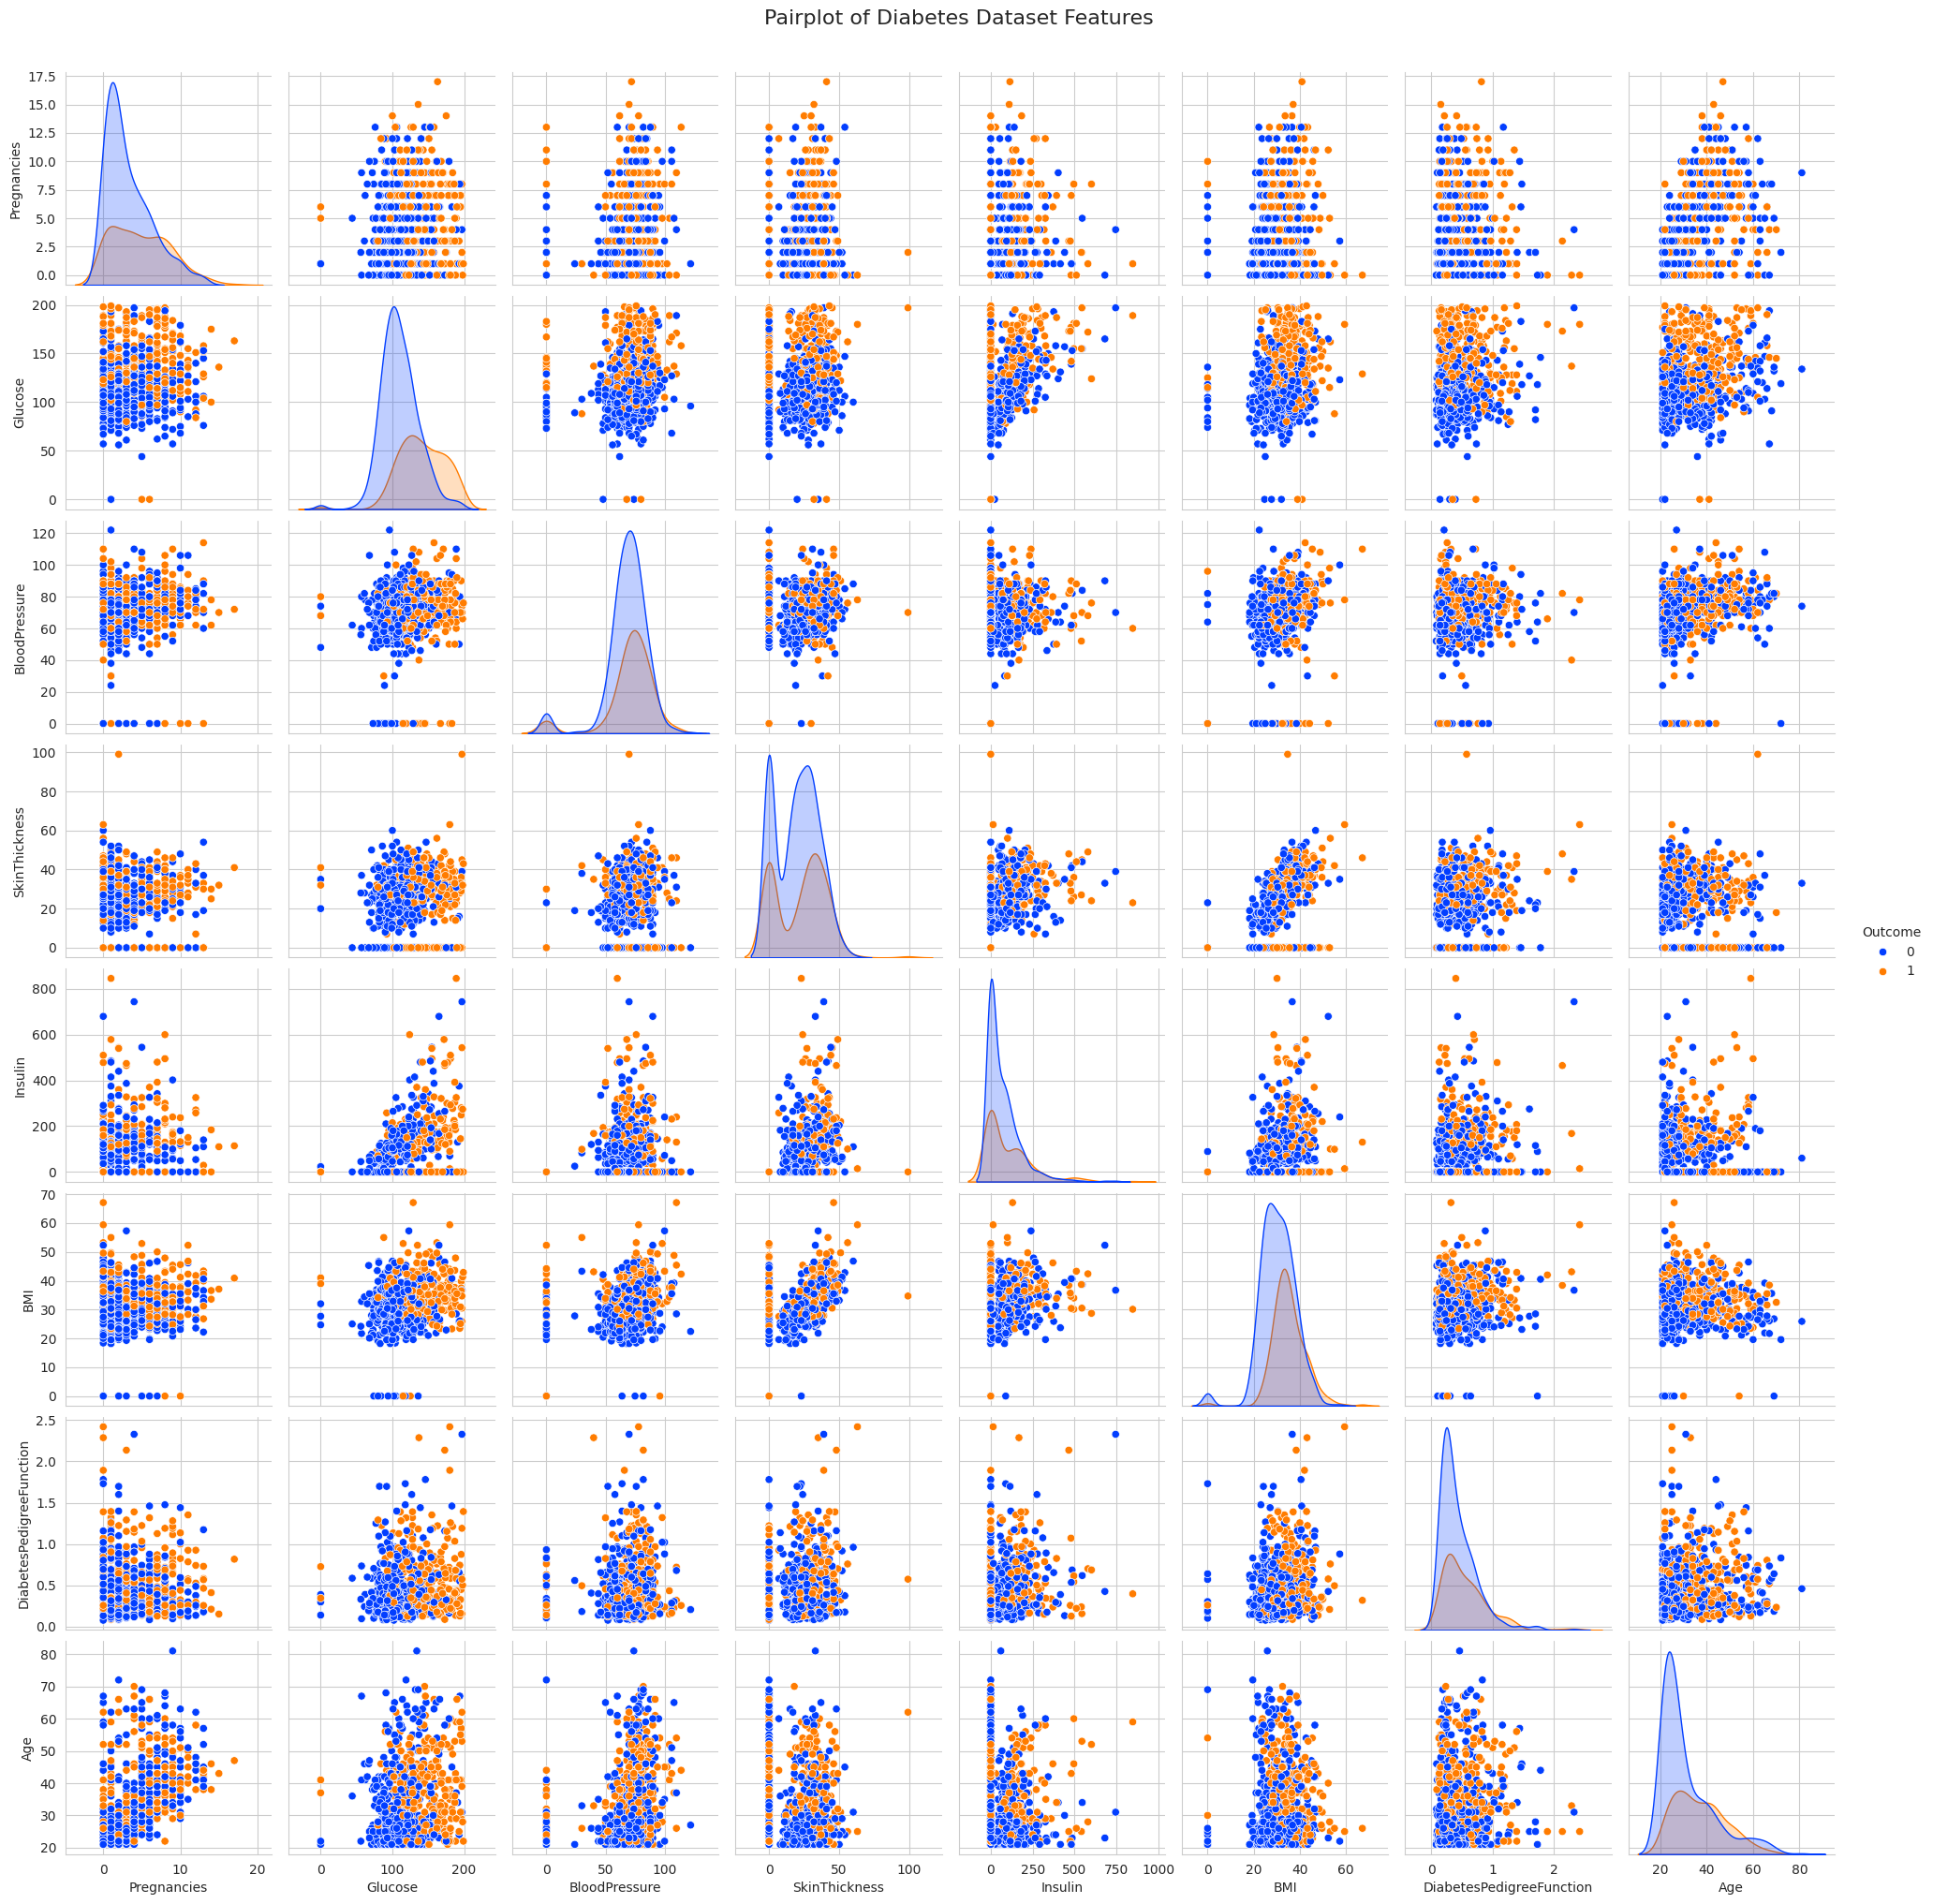

In [112]:
# Task-2: Pairplot of the diabetes dataset
plt.figure(figsize=(12, 10))
sns.pairplot(diabetes_data, hue='Outcome', palette='bright', diag_kind='kde')
plt.suptitle("Pairplot of Diabetes Dataset Features", fontsize=16, y=1.02)
plt.show()


## BMI vs Outcome

<Axes: xlabel='Outcome', ylabel='BMI'>

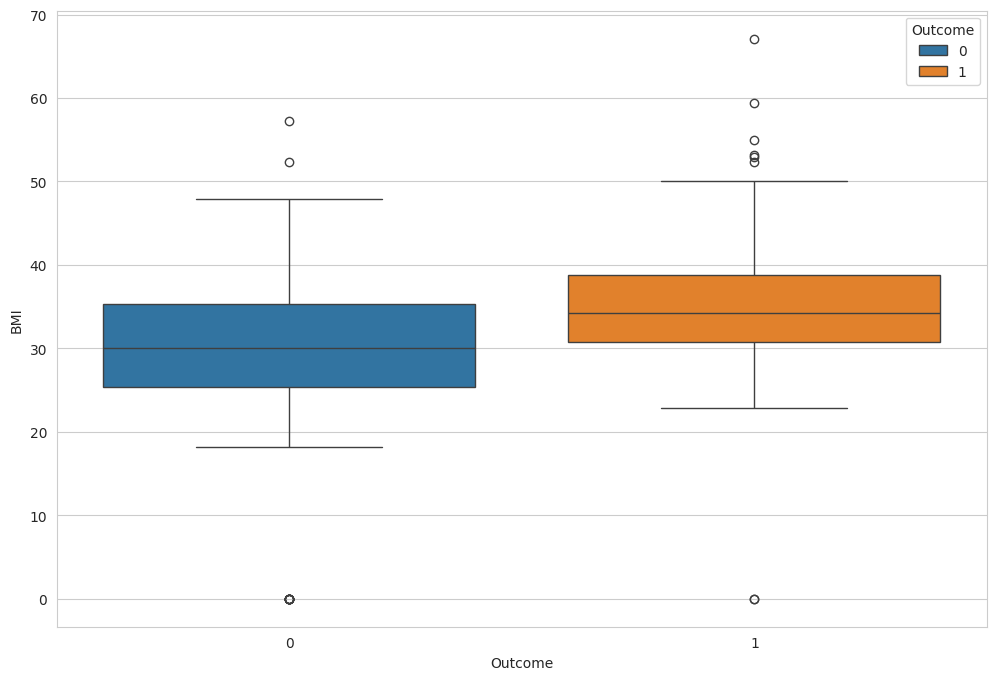

In [113]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

It is surprising that the median BMI does not significanty change as the number of pregnancies increases. Those who tested positive for diabetes had higher BMIs than those who did not. However,there is not a very large difference between the medians.

BMI might be higher for women who have had more numbers of pregnancies as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

## Pedigree function vs Diabetes

In [114]:
## TASK-3: Display a boxplot between the Pedigree function and Diabetes.

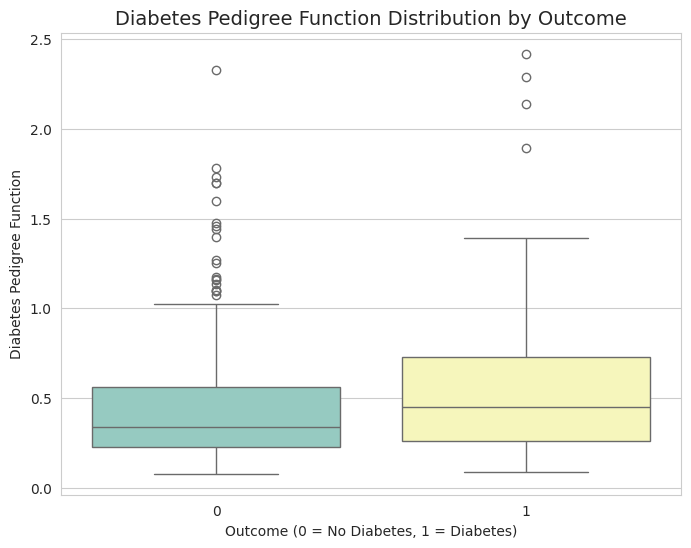

In [115]:
# Task-3: Boxplot for Diabetes Pedigree Function vs Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_data, palette='Set3')
plt.title("Diabetes Pedigree Function Distribution by Outcome", fontsize=14)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Diabetes Pedigree Function")
plt.show()


<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>
This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to have lower pedigree functions than those who tested positive. This indicates that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

## Pregnancy vs Diabetes

In [116]:
## TASK-4: Display a boxplot between the number of Pregnancies and Diabetes.

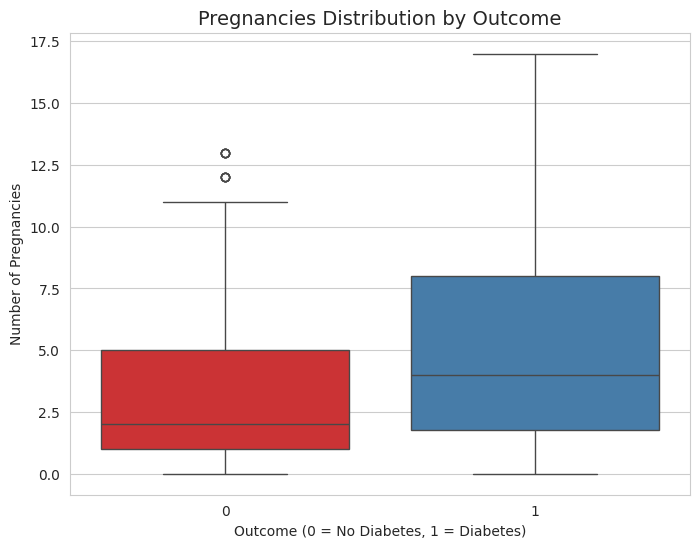

In [117]:
# Task-4: Boxplot for Pregnancies vs Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=diabetes_data, palette='Set1')
plt.title("Pregnancies Distribution by Outcome", fontsize=14)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Number of Pregnancies")
plt.show()


<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The average number of pregnancies is higher in diabetic as compared to non-diabetic women.

## Prevalence of Diabetes vs BMI

Let's try to find out the prevalence of diabetes and its relation to their BMI. Please note that the range of normal BMI is 18.5 to 25.

In [118]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

,count
Outcome,
0,101
1,7


In [119]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

,count
Outcome,
0,399
1,261


<Axes: xlabel='Outcome', ylabel='BMI'>

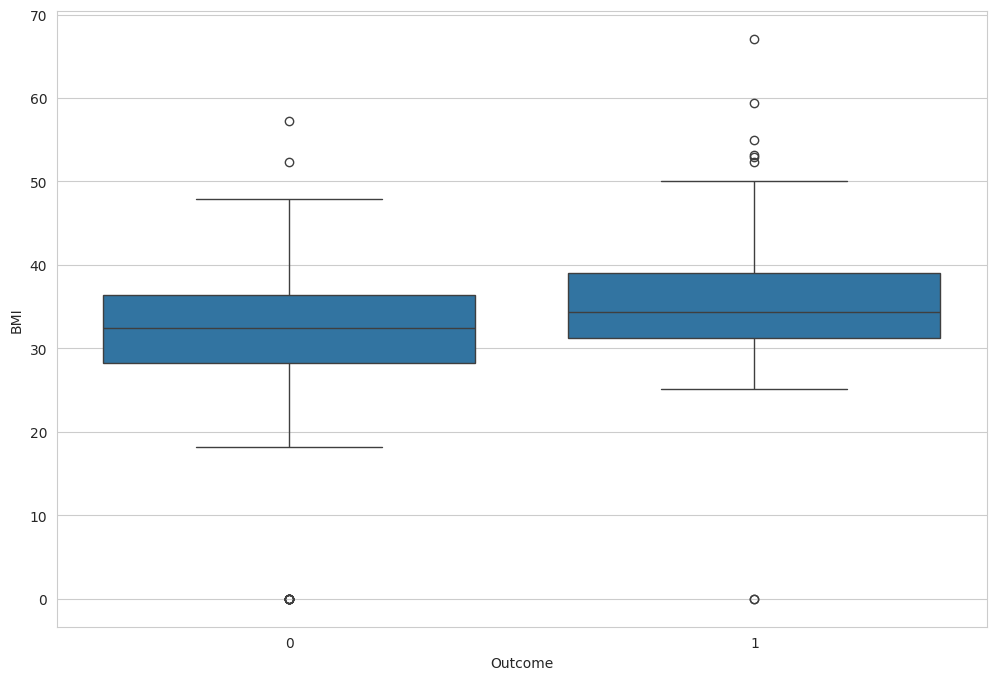

In [120]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The Body Mass Index (BMI) shows a significant association with the occurrence of diabetes.  
The interquartile range for the women who tested positive reaches a higher BMI than the IQR for those who tested negative. Therefore, women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative.


## Age vs Diabetes

In [121]:
## TASK-5: Display a boxplot between Age and Diabetes.

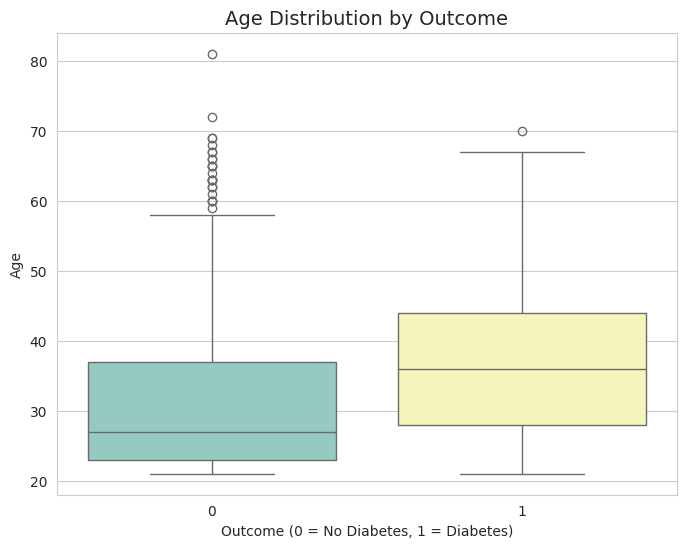

In [122]:
# Task-5: Boxplot for Age vs Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=diabetes_data, palette='Set3')
plt.title("Age Distribution by Outcome", fontsize=14)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Age")
plt.show()


<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A significant relation can be seen between the age distribution and occurrence of diabetes. Women at age group > 31 years were at higher risk of getting diabetes in comparison to the younger age group.

# The Importance of Standardizing Data

In [123]:
unchanged_data = diabetes_data.drop('Outcome',axis=1)

In [124]:
unchanged_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

*Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.*

In [127]:
##########################
##########################

## TASK-6 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################


def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  ## [REQUIRED] Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
  X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=42, stratify=ydata)

  for i in range(1,40):
      ## [REQUIRED] Complete the code in the next three lines
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)

      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores


In [86]:
#@title Answer to Task-6. Refer to and run this only if you are unable to complete the task in the previous cell.
def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

  for i in range(1,40):
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)

      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores


Max train score 100.0 % and k = [1]

Max test score 74.89177489177489 % and k = [23]


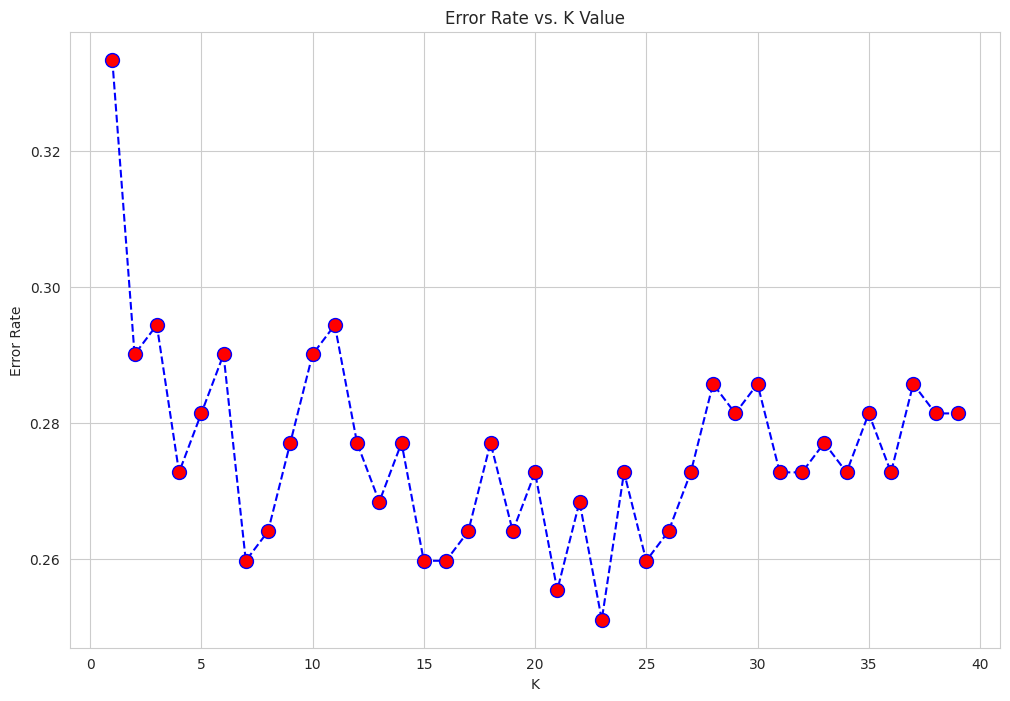

In [128]:
unchanged_test_scores = plot_KNN_error_rate(unchanged_data,diabetes_data['Outcome'])

## Standardize the Variables
Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ Z = {X - \mu \over \sigma}$$


In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [130]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

StandardScaler()

In [131]:
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))

In [132]:
df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496



Max train score 100.0 % and k = [1]

Max test score 76.19047619047619 % and k = [10, 15]


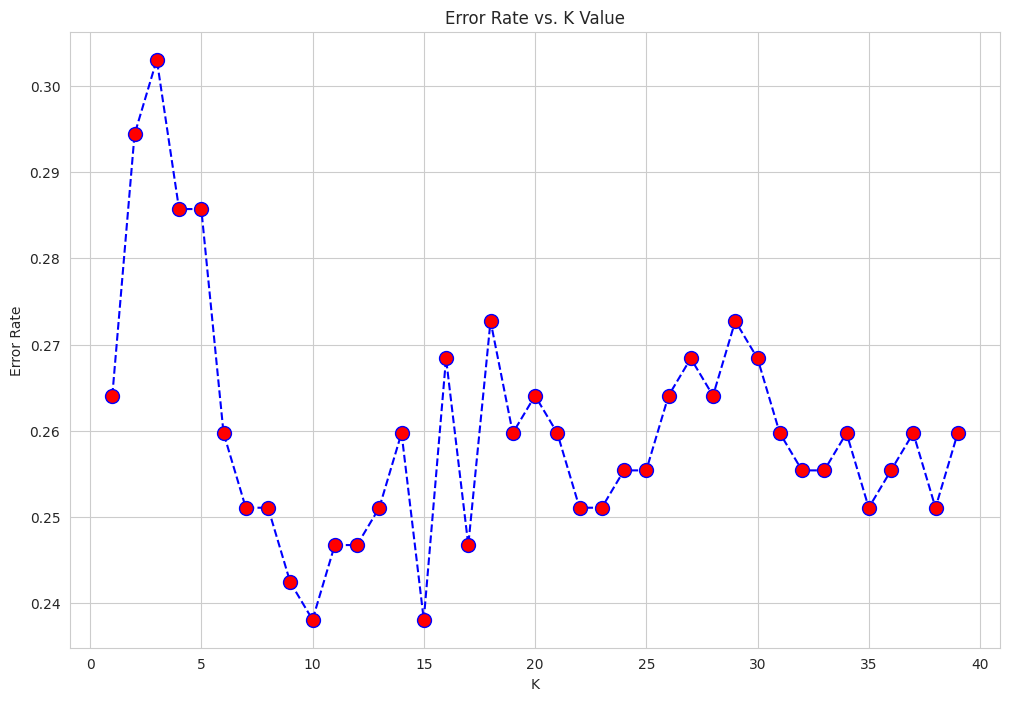

In [133]:
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])

## Comparing Accuracy before and after Standardization

<Axes: title={'center': 'Accuracy vs. K Value'}>

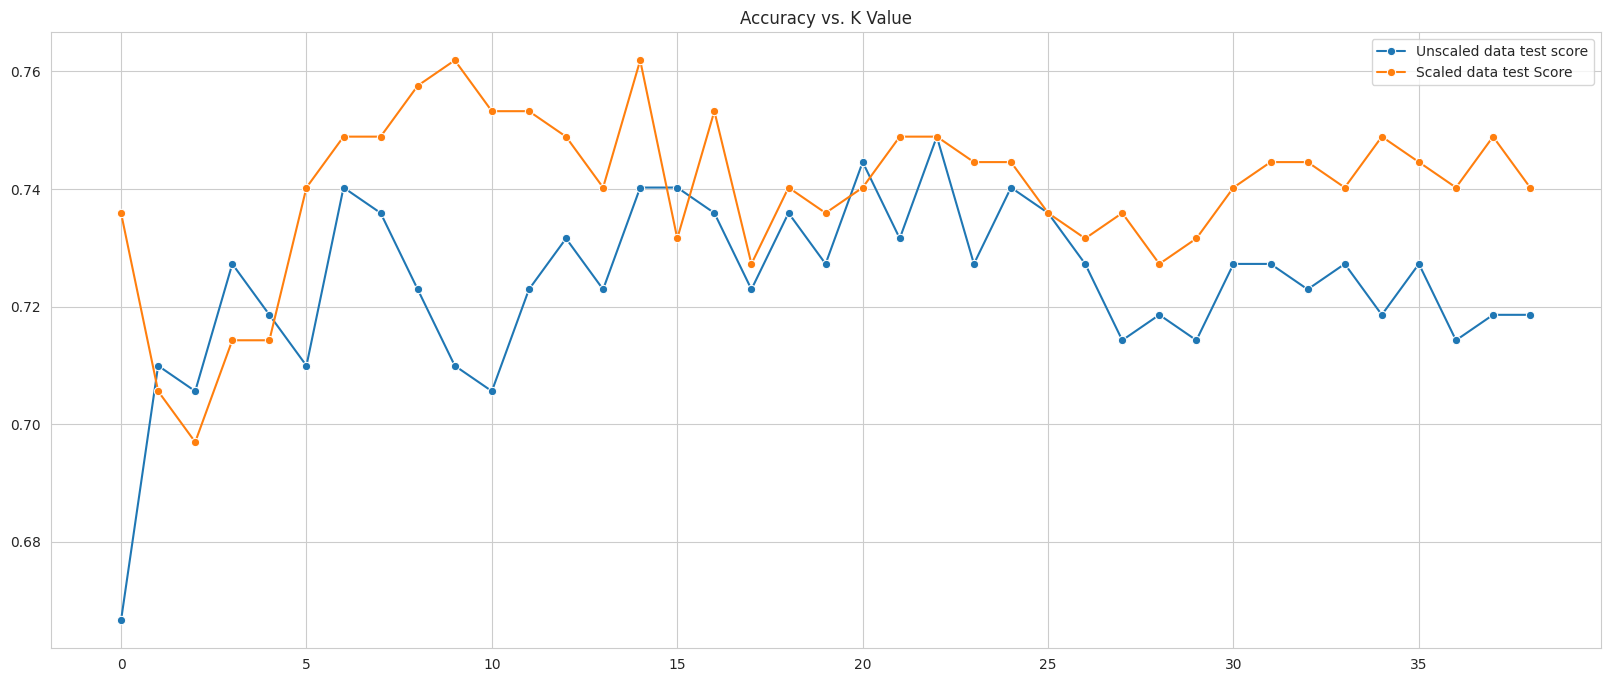

In [134]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data test Score')

In [135]:
## TASK-7: Refer to MinMax Scaler provided in scikit-learn.
## Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.


Max train score 100.0 % and k = [1]

Max test score 75.75757575757575 % and k = [11]


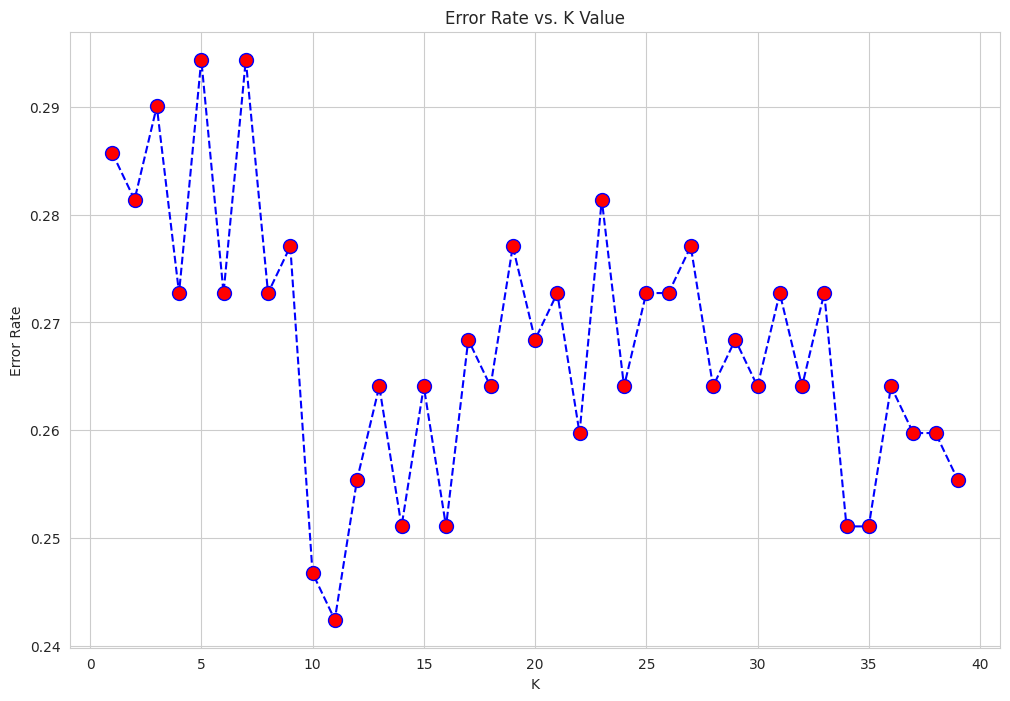

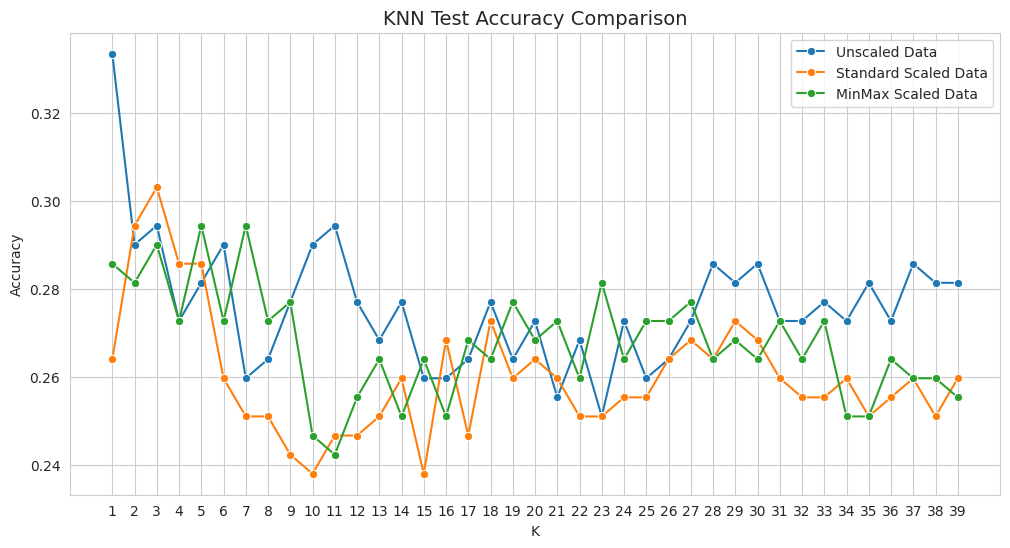

In [136]:

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(diabetes_data.drop('Outcome', axis=1))
minmax_test_scores = plot_KNN_error_rate(minmax_scaled_data, diabetes_data['Outcome'])
plt.figure(figsize=(12, 6))
plt.title('KNN Test Accuracy Comparison', fontsize=14)
sns.lineplot(x=range(1, len(unchanged_test_scores)+1),
             y=1 - np.array(unchanged_test_scores),
             marker='o',
             label='Unscaled Data')
sns.lineplot(x=range(1, len(scaled_test_scores)+1),
             y=1 - np.array(scaled_test_scores),
             marker='o',
             label='Standard Scaled Data')
sns.lineplot(x=range(1, len(minmax_test_scores)+1),
             y=1 - np.array(minmax_test_scores),
             marker='o',
             label='MinMax Scaled Data')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(unchanged_test_scores)+1))
plt.legend()
plt.show()


In [96]:
## TASK-8:
## Plot the voronoi diagram for the TASK-7

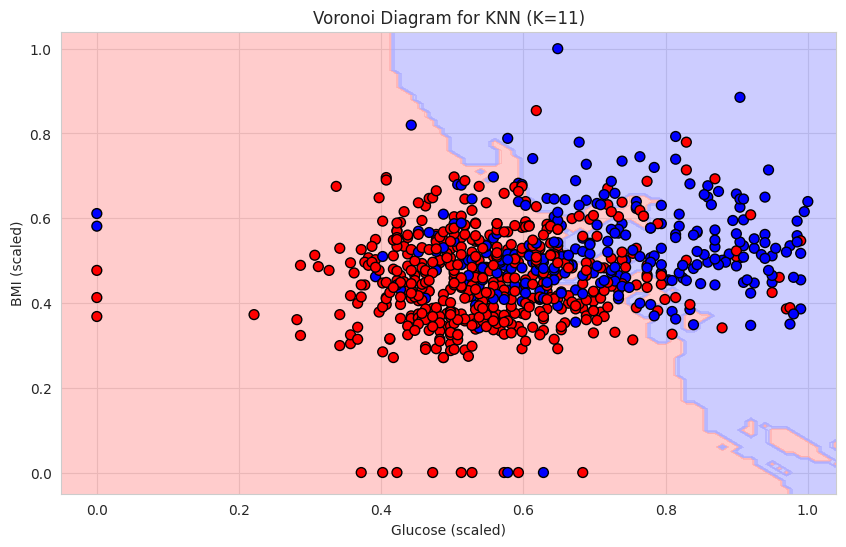

In [137]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
X_voronoi = diabetes_data[['Glucose', 'BMI']].values
y_voronoi = diabetes_data['Outcome'].values
scaler_2d = MinMaxScaler()
X_voronoi_scaled = scaler_2d.fit_transform(X_voronoi)
best_k = 11
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_voronoi_scaled, y_voronoi)
h = 0.01
x_min, x_max = X_voronoi_scaled[:, 0].min() - 0.05, X_voronoi_scaled[:, 0].max() + 0.05
y_min, y_max = X_voronoi_scaled[:, 1].min() - 0.05, X_voronoi_scaled[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_voronoi_scaled[:, 0], X_voronoi_scaled[:, 1], c=y_voronoi, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Glucose (scaled)')
plt.ylabel('BMI (scaled)')
plt.title(f'Voronoi Diagram for KNN (K={best_k})')
plt.show()


In [98]:
## TASK-9: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.

=== Unscaled Data ===
KNN with k=11, 5-Fold CV
Accuracy scores for each fold: [0.73376623 0.74025974 0.72077922 0.73202614 0.73856209]
Mean accuracy: 0.7331, Std deviation: 0.0068

=== Standard Scaled Data ===
KNN with k=11, 5-Fold CV
Accuracy scores for each fold: [0.71428571 0.73376623 0.75324675 0.7254902  0.7254902 ]
Mean accuracy: 0.7305, Std deviation: 0.0130

=== MinMax Scaled Data ===
KNN with k=11, 5-Fold CV
Accuracy scores for each fold: [0.72077922 0.70779221 0.76623377 0.74509804 0.7254902 ]
Mean accuracy: 0.7331, Std deviation: 0.0205



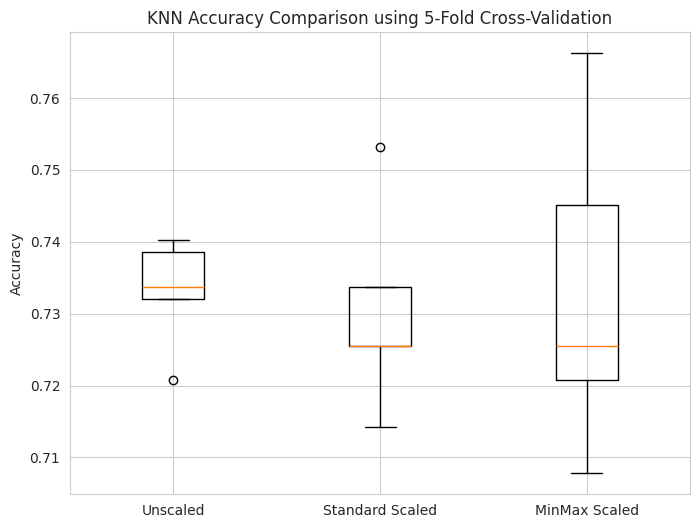

In [138]:
from sklearn.model_selection import cross_val_score, KFold
def knn_kfold_cv(X, y, k_neighbors=11, n_splits=5):
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    print(f"KNN with k={k_neighbors}, {n_splits}-Fold CV")
    print(f"Accuracy scores for each fold: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f}, Std deviation: {cv_scores.std():.4f}\n")
    return cv_scores
print("=== Unscaled Data ===")
cv_scores_unscaled = knn_kfold_cv(unchanged_data, diabetes_data['Outcome'], k_neighbors=11, n_splits=5)
print("=== Standard Scaled Data ===")
cv_scores_standard = knn_kfold_cv(scaled_data, diabetes_data['Outcome'], k_neighbors=11, n_splits=5)
print("=== MinMax Scaled Data ===")
cv_scores_minmax = knn_kfold_cv(minmax_scaled_data, diabetes_data['Outcome'], k_neighbors=11, n_splits=5)
plt.figure(figsize=(8,6))
plt.boxplot([cv_scores_unscaled, cv_scores_standard, cv_scores_minmax],
            labels=['Unscaled','Standard Scaled','MinMax Scaled'])
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Comparison using 5-Fold Cross-Validation')
plt.show()


# Conclusion

From the data analysis we carried out, it seems that there is some form of an association between BMI, number of pregnancies, pedigree function, and the test results for diabetes.

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems.

# References

https://www.kaggle.com/dktalaicha/diabetes-prediction-by-knn